In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import math,time


In [2]:
df=pd.read_csv('T_30min with indicators.csv',index_col=0)
df.dropna(inplace=True)
df.insert(0,'rr',df['close_30min']/df['open_30min']-1)

## 数据降维


In [3]:
from source.models import correlation
dataset=correlation(df)
dataset

,rr,open_30min,volume_30min,MACD_12_26_30min,RSI_14_30min,ADX_14_30min,ADX_28_30min,K_9_3_30min,TRIX_30_9_30min,TRIX_60_15_30min,...,BR_20_30min,volume_5min,MACD_12_26_5min,WillR_14_5min,TRIX_30_9_5min,MFI_14_5min,MFI_28_5min,AR_10_5min,AR_20_5min,BR_26_5min
2018/12/5 10:15,-0.000051,97.330,6163,0.095268,76.154149,34.582740,17.412006,78.371526,0.003048,0.003868,...,196.178344,458.0,0.063166,-20.895522,1.465998,42.975289,39.133915,73.913043,110.389610,151.000000
2018/12/5 10:45,-0.000051,97.325,2858,0.105405,75.643044,36.335907,18.241438,79.655091,0.003401,0.003860,...,271.304348,373.0,0.053877,-52.380952,1.041360,32.421742,44.576565,84.375000,102.597403,185.185185
2018/12/5 11:15,0.000000,97.320,2179,0.114574,75.643044,38.003958,19.056562,79.852365,0.003791,0.003861,...,252.500000,317.0,0.039195,-53.846154,0.744857,66.403160,45.447290,117.391304,111.111111,178.048780
2018/12/5 13:15,-0.000103,97.320,2418,0.122234,74.483530,39.305217,19.786591,78.568244,0.004213,0.003871,...,231.250000,323.0,0.022795,-60.000000,0.505980,53.042032,33.969069,136.363636,118.181818,111.940299
2018/12/5 13:45,-0.000308,97.310,4172,0.127790,70.968888,39.706727,20.306258,75.045496,0.004658,0.003890,...,212.500000,321.0,0.008951,-56.521739,0.363591,30.130904,42.214855,65.625000,82.456140,91.304348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/12/17 13:30,0.000206,97.245,4083,-0.009183,42.354323,14.599749,9.135214,27.022200,-0.001338,-0.000331,...,71.794872,416.0,-0.021691,-35.714286,-0.001175,42.711543,39.539902,123.809524,61.428571,78.823529
2020/12/17 14:00,0.000000,97.260,3955,-0.012000,41.918905,14.452013,8.970579,24.518865,-0.001344,-0.000342,...,72.549020,838.0,-0.015611,-42.857143,-0.001507,36.489343,27.206273,192.857143,104.255319,68.292683
2020/12/17 14:30,-0.000360,97.260,4976,-0.015243,38.903922,14.848171,8.951933,17.933212,-0.001358,-0.000354,...,67.295597,970.0,-0.012716,-86.666667,-0.001645,28.732549,29.758558,78.571429,108.510638,92.537313
2020/12/17 15:00,-0.000154,97.225,3783,-0.018786,37.653970,15.280952,8.951276,11.955475,-0.001382,-0.000367,...,69.281046,910.0,-0.014616,-100.000000,-0.001730,26.445989,36.590212,100.000000,113.953488,108.196721


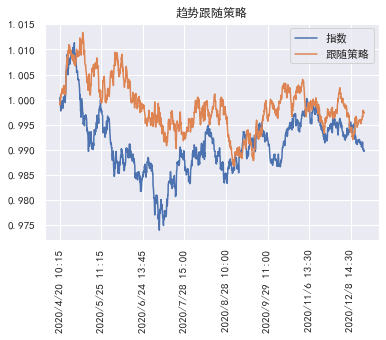

In [67]:
df_test=pd.DataFrame(df['rr'])
df_test['buy']=df_test['rr'].shift(1)>=0
df_test['buy_and_sell']=df_test['buy'].apply(lambda x:1 if x else -1)
df_test['rr_stg']=df_test['rr']*df_test['buy_and_sell']

# 计算累计收益率
(df_test[['rr','rr_stg']]+1).iloc[-testY.shape[0]:].cumprod().plot(title='趋势跟随策略')
plt.legend(['指数','跟随策略'])
plt.xticks(rotation=90)
plt.show()


In [113]:
rr=(np.array(df_test['rr'])>0).tolist()


rr.count(False)

2288

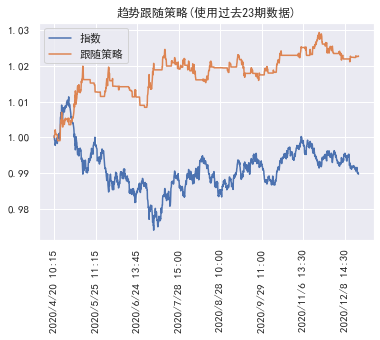

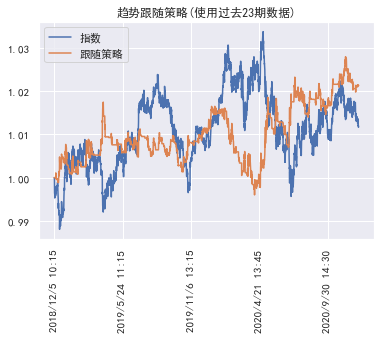

In [163]:
df_test=pd.DataFrame(df['rr'])
df_test['buy']=df_test['rr'].shift(1)>=0

rr=(df_test['rr']>0).tolist()

watch_window,threshold=23,0.6

buy_and_sell_list=[0]*watch_window
for i in range(watch_window,len(rr)):
    false_num=((rr[i-watch_window:i]).count(False))
    if false_num >=watch_window*threshold:
        buy_and_sell_list.append(-1)
    elif false_num <=watch_window*(1-threshold):
        buy_and_sell_list.append(1)
    else:
        buy_and_sell_list.append(0)
df_test['buy_and_sell']=buy_and_sell_list
df_test['rr_stg']=df_test['buy_and_sell']*df_test['rr']
# 计算累计收益率

(df_test[['rr','rr_stg']]+1).iloc[-testY.shape[0]:].cumprod().plot(title='趋势跟随策略(使用过去{}期数据)'.format(watch_window))
plt.legend(['指数','跟随策略'])
plt.xticks(rotation=90)
plt.show()

(df_test[['rr','rr_stg']]+1).cumprod().plot(title='趋势跟随策略(使用过去{}期数据)'.format(watch_window))
plt.legend(['指数','跟随策略'])
plt.xticks(rotation=90)
plt.show()

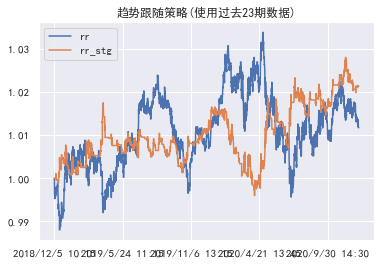

In [151]:
(df_test[['rr','rr_stg']]+1).cumprod().plot(title='趋势跟随策略(使用过去{}期数据)'.format(watch_window))


## 生成数据集

In [4]:
def create_dataset(dataset:np.ndarray, look_back:int):  # 后一个数据和前look_back个数据有关系
    assert not (isinstance(dataset,np.ndarray) and isinstance(dataset,pd.core.frame.DataFrame)) ,'输入数据格式不符合要求，使用pandas或numpy'
    dataset=np.array(dataset)

    dataX, dataY = [],[]
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)  #
        dataY.append(dataset[:,0][i + look_back]) #此处Y要第一列（收益率） 
        
    dataX,dataY=np.array(dataX),np.array(dataY)
    dataX,dataY=np.reshape(dataX,(dataX.shape[0],-1)),np.reshape(dataY,(-1,1))# 转变为二维数据
    
    # 进行数据归一化
    from sklearn.preprocessing import MinMaxScaler
    
    scalerX = MinMaxScaler(feature_range=(0, 1))  # 归一化0-1
    scalerX.fit(dataX)
    dataX=scalerX.transform(dataX)

    scalerY = MinMaxScaler(feature_range=(0, 1))  # 归一化0-1
    scalerY.fit(dataY)
    dataY=scalerY.transform(dataY)
    
    return np.array(dataX), np.array(dataY),scalerX,scalerY  # 生成输入数据和输出数据

In [5]:
totX, totY, scalerX, scalerY = create_dataset(np.array(dataset), look_back=10)  # 训练输入输出

def split_dataset(dataset):
    dataset=np.array(dataset)
    train_size = int(len(dataset) * 0.67)  # %67的训练集，剩下测试集
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]  # 训练集和测试集    
    return train,test

trainX,testX=split_dataset(totX)
trainY,testY=split_dataset(totY)
print(trainX.shape)

(2976, 240)


In [6]:
def result_plot(result,draw=False):
    result_raw=scalerY.inverse_transform(result)
    testY_raw=scalerY.inverse_transform(testY)

    if draw:
        print('预测与实际的收益率情况')
        sns.distplot(pd.DataFrame(result_raw[:,0]))
        sns.distplot(pd.DataFrame(testY_raw[:,0]))
        plt.legend(['预测','实际'])
        plt.show()
    
    result_df=pd.DataFrame({'pred':result_raw[:,0]})
    result_df['real']=testY_raw[:,0]


    result_df['buy']=result_df['pred']>0 #只做多
    result_df['buy_and_sell']=result_df['pred'].apply(lambda x:1 if x>0 else -1 ) # 加做空

    result_df['real_return']=(1+result_df['real']).cumprod()
    result_df['stg_buy']=((result_df['real']*result_df['buy'])+1).cumprod()
    result_df['stg_buy_and_sell']=((result_df['real']*result_df['buy_and_sell'])+1).cumprod()
    return result_df

In [23]:
from source.Ratio import ratio

def the_ratios(test_pred,draw=False):
    result_df=result_plot(test_pred,draw)
    result_df.index=df.index[-len(result_df):]
    result_df['buy_rr']=result_df['real']*result_df['buy']
    result_df['buy_sell_rr']=result_df['real']*result_df['buy_and_sell']
    ratios=ratio().cal_ratio(pd.DataFrame(result_df[['real','buy_rr','buy_sell_rr']]),day=False)
    ratios.columns=['期货','策略(多仓)','策略(多空仓)']
    if draw:
        result_df[['real_return','stg_buy','stg_buy_and_sell']].plot(title='简单神经网络')
        plt.legend(['期货','策略（多仓）','策略（多空仓）'])
        plt.xticks(rotation=90)
        plt.show()
    return ratios

## 简单神经网络

In [8]:
from source.models import ann_model
model_ann=ann_model(trainX,trainY)


In [9]:
pred_x_ann=model_ann.predict(testX)
the_ratios(pred_x_ann).loc[['累计收益率','胜率','最大回撤']]

,期货,策略(多仓),策略（多空仓）
累计收益率,0.989163,0.980999,0.972552
胜率,0.486926,0.481583,0.493993
最大回撤,0.036885,0.025654,0.041561


## LSTM

In [10]:
# 调整数据的输入格式，24维*10天
trainX_LSTM=np.reshape(trainX,(trainX.shape[0],24,-1)) 
testX_LSTM=np.reshape(testX,(testX.shape[0],24,-1))

from source.models import lstm_model
model_lstm=lstm_model(trainX_LSTM,trainY)

In [11]:
pred_x_lstm=model_lstm.predict(testX_LSTM)
the_ratios(pred_x_lstm).loc[['累计收益率','胜率','最大回撤']]

,期货,策略(多仓),策略（多空仓）
累计收益率,0.989163,1.028339,1.068651
胜率,0.486926,0.520124,0.531449
最大回撤,0.036885,0.009488,0.011858


## xgboost


In [12]:
# 调整数据的输入格式，24维*10天
import xgboost as xgb
testX_xgb = xgb.DMatrix(np.reshape(testX,(testX.shape[0],-1)))
from source.models import xbg_model

model_xgb=xbg_model(trainX,trainY)

预测与实际的收益率情况


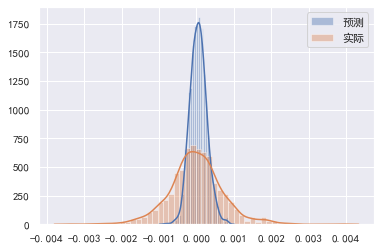

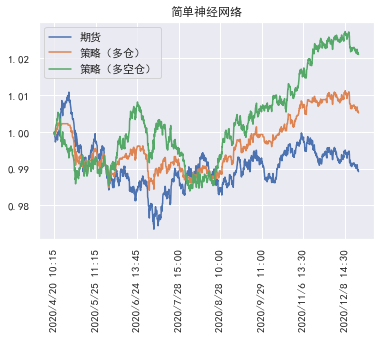

,期货,策略(多仓),策略(多空仓)
累计收益率,0.989163,1.005131,1.021034
胜率,0.486926,0.496368,0.508834
最大回撤,0.036885,0.018216,0.024056


In [24]:
pred_x_xgb=model_xgb.predict(testX_xgb)
pred_x_xgb=np.reshape(pred_x_xgb,(-1,1))
the_ratios(pred_x_xgb,draw=True).loc[['累计收益率','胜率','最大回撤']]

In [25]:
trainX

array([[0.4635732 , 0.18525896, 0.24947694, ..., 0.03229511, 0.11421507,
        0.13687574],
       [0.46357289, 0.18459495, 0.09915401, ..., 0.07170271, 0.11946083,
        0.16881181],
       [0.46966587, 0.18393094, 0.06827072, ..., 0.13523068, 0.11737867,
        0.18719489],
       ...,
       [0.46966587, 0.89508632, 0.1154371 , ..., 0.07064555, 0.25441952,
        0.2417362 ],
       [0.37148246, 0.89508632, 0.15937415, ..., 0.08655765, 0.12926969,
        0.19002808],
       [0.49278699, 0.88379814, 0.19949058, ..., 0.0577074 , 0.07931823,
        0.09214024]])

In [10]:
def write_to_csv(ratio_df,filename='init'):
    with open('./output/多次运行比较_{}.csv'.format(filename),'a') as f:
        need_info=np.reshape(np.array(ratio_df.loc[['累计收益率','胜率','最大回撤']]),(1,-1))[0]
        need_info=np.around(need_info,6)
        '''
        期货累计收益率	策略1累计收益率	策略2累计收益率	期货胜率	策略1胜率	策略2胜率	期货最大回撤	策略1最大回撤	策略2最大回撤
        '''
        output_str=str(need_info.tolist())[1:-1]+'\n'
        f.write(output_str)
        f.close()
    return 0

In [12]:
# t00=time.time()

# for i in range(30):
    
# #     t0=time.time()
# #     model_ann=ann_model(trainX,trainY)
# #     pred_x_ann=model_ann.predict(testX)
# #     write_to_csv(the_ratios(pred_x_ann),filename='ann')
# #     print('第{}个循环，当前用时:{:.2f}s，总用时：{:.2f}s'.format(i,time.time()-t0,time.time()-t00))
        
# #     t0=time.time()
# #     model_lstm=lstm_model(trainX_LSTM,trainY)
# #     pred_x_lstm=model_lstm.predict(testX_LSTM)
# #     write_to_csv(the_ratios(pred_x_lstm),filename='lstm')
# #     print('第{}个循环，当前用时:{:.2f}s，总用时：{:.2f}s'.format(i,time.time()-t0,time.time()-t00))
    
#     t0=time.time()
#     model_xgb=xbg_model(trainX,trainY)
#     pred_x_xgb=model_xgb.predict(testX_xgb)
#     pred_x_xgb=np.reshape(pred_x_xgb,(-1,1))
#     write_to_csv(the_ratios(pred_x_xgb),filename='xgb')
#     print('第{}个循环，当前用时:{:.2f}s，总用时：{:.2f}s'.format(i,time.time()-t0,time.time()-t00))


[0]	train-auc:0.50908
[999]	train-auc:0.57540
第0个循环，当前用时:6.96s，总用时：6.96s
[0]	train-auc:0.51259
[999]	train-auc:0.57549
第1个循环，当前用时:6.92s，总用时：13.88s
[0]	train-auc:0.51365
[999]	train-auc:0.57553
第2个循环，当前用时:6.99s，总用时：20.87s
[0]	train-auc:0.51268
[999]	train-auc:0.57557
第3个循环，当前用时:7.08s，总用时：27.96s
[0]	train-auc:0.51451
[999]	train-auc:0.57550
第4个循环，当前用时:7.17s，总用时：35.13s
[0]	train-auc:0.51065
[999]	train-auc:0.57555
第5个循环，当前用时:7.56s，总用时：42.69s
[0]	train-auc:0.51475
[999]	train-auc:0.57553
第6个循环，当前用时:7.62s，总用时：50.31s
[0]	train-auc:0.51557
[999]	train-auc:0.57555
第7个循环，当前用时:7.65s，总用时：57.95s
[0]	train-auc:0.51177
[999]	train-auc:0.57553
第8个循环，当前用时:7.67s，总用时：65.62s
[0]	train-auc:0.51129
[999]	train-auc:0.57546
第9个循环，当前用时:7.68s，总用时：73.31s
[0]	train-auc:0.50967
[999]	train-auc:0.57554
第10个循环，当前用时:7.44s，总用时：80.75s
[0]	train-auc:0.51084
[999]	train-auc:0.57552
第11个循环，当前用时:7.21s，总用时：87.96s
[0]	train-auc:0.51468
[999]	train-auc:0.57546
第12个循环，当前用时:7.19s，总用时：95.15s
[0]	train-auc:0.51244
[999]	train-au